Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Now let's take load the data and take a look at it.

In [2]:
df_observations = pd.read_csv("observations.csv")
df_species = pd.read_csv("species_info.csv")

In [3]:
print(df_observations)

                               scientific_name  \
0                           Vicia benghalensis   
1                               Neovison vison   
2                            Prunus subcordata   
3                         Abutilon theophrasti   
4                     Githopsis specularioides   
...                                        ...   
23291                     Croton monanthogynus   
23292                 Otospermophilus beecheyi   
23293  Heterotheca sessiliflora ssp. echioides   
23294                     Dicranella rufescens   
23295                           Cucurbita pepo   

                                 park_name  observations  
0      Great Smoky Mountains National Park            68  
1      Great Smoky Mountains National Park            77  
2                   Yosemite National Park           138  
3                      Bryce National Park            84  
4      Great Smoky Mountains National Park            85  
...                                    ...   

In [4]:
print(df_species)

            category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  
0                              Gapper's Red-Backed Vole                 NaN  
1                                 American Bison, Bison                 NaN  
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3     Domestic Sheep, Moufl

So, in observations.csv we have a list of the number of times each species was observed in each park. In species_info.csv we have a list of species with their respective category, common name, and conservation status. What can we do with this? One thing we could do is make bar charts showing how many of each category are seen in each park. This would tell us immediately which parks have the most sightings and what type of wildlife is seen most often. Another thing we could do is look at endangered species and see if they are observed at significantly lower rates than other species in their category.

First, I'll write a function that gives me the category when I input the scientific name of a species. The simplest thing will be to just create a dictionary.

In [5]:
category_dict = dict(zip(df_species.scientific_name, df_species.category))
#print(category_dict)

Now I'll use it to make a new column.

In [6]:
getCategory = lambda scientific_name: category_dict[scientific_name]
df_observations['Category'] = df_observations.scientific_name.apply(getCategory)
print(df_observations)

                               scientific_name  \
0                           Vicia benghalensis   
1                               Neovison vison   
2                            Prunus subcordata   
3                         Abutilon theophrasti   
4                     Githopsis specularioides   
...                                        ...   
23291                     Croton monanthogynus   
23292                 Otospermophilus beecheyi   
23293  Heterotheca sessiliflora ssp. echioides   
23294                     Dicranella rufescens   
23295                           Cucurbita pepo   

                                 park_name  observations           Category  
0      Great Smoky Mountains National Park            68     Vascular Plant  
1      Great Smoky Mountains National Park            77             Mammal  
2                   Yosemite National Park           138     Vascular Plant  
3                      Bryce National Park            84     Vascular Plant  
4      Gr

Now I'll merge all species from the same category together.

In [7]:
df_categories = df_observations.groupby(['park_name', 'Category'])['observations'].sum().reset_index()
print(df_categories)

                              park_name           Category  observations
0                   Bryce National Park          Amphibian          7380
1                   Bryce National Park               Bird         51647
2                   Bryce National Park               Fish         12423
3                   Bryce National Park             Mammal         20550
4                   Bryce National Park  Nonvascular Plant         32992
5                   Bryce National Park            Reptile          7950
6                   Bryce National Park     Vascular Plant        443083
7   Great Smoky Mountains National Park          Amphibian          5707
8   Great Smoky Mountains National Park               Bird         37728
9   Great Smoky Mountains National Park               Fish          9206
10  Great Smoky Mountains National Park             Mammal         15012
11  Great Smoky Mountains National Park  Nonvascular Plant         24857
12  Great Smoky Mountains National Park            

Now I'll make a bar chart representing the categories found in the various national parks.

Text(0.5, 1.0, 'Species observed in National Parks')

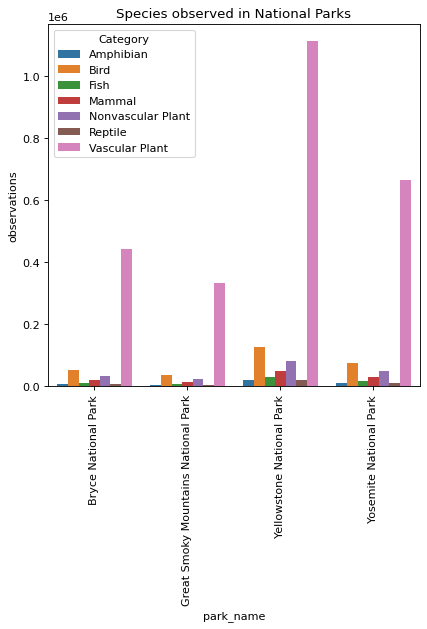

In [12]:
fig = plt.figure(figsize=(6, 6), dpi=80)
bar1 = sns.barplot(x="park_name",  y="observations", data=df_categories, hue='Category')
plt.xticks(rotation=90)
plt.title("Species observed in National Parks")

The vascular plants are so common that they make it hard to see how many animals there are. I'll make another plot with just animals.

Text(0.5, 1.0, 'Types of animals observed in National Parks')

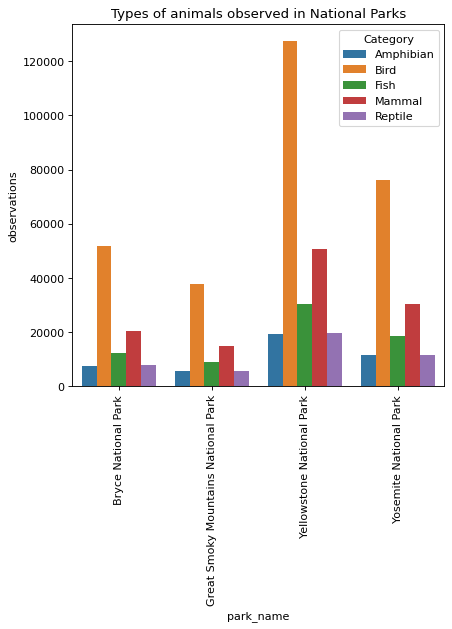

In [14]:
df_animals = df_categories[df_categories.Category.isin(["Amphibian", "Bird", "Fish", "Mammal", "Reptile"])]
fig = plt.figure(figsize=(6, 6), dpi=80)
bar1 = sns.barplot(x="park_name",  y="observations", data=df_animals, hue='Category')
plt.xticks(rotation=90)
plt.title("Types of animals observed in National Parks")

Now we can clearly see that birds are observed far more often than other types of animals in every park. Amphibians and reptiles are the least observed. Yellowstone has more observations of every category of animal.

Let's look at the conservation status now. We'll do the same thing but looking at conservation status instead of animal types to see which park has the most rare and endangered animals.

In [15]:
conservation_dict = dict(zip(df_species.scientific_name, df_species.conservation_status))
getConservationStatus = lambda scientific_name: conservation_dict[scientific_name]
df_observations['conservation_status'] = df_observations.scientific_name.apply(getConservationStatus)

Most observations will have a NaN value for the conservation status, so let's restrict it to those that have a value.

In [19]:
df_conservation = df_observations.dropna()
print(df_conservation)

                                scientific_name  \
24                             Zizia trifoliata   
36             Camissonia sierrae ssp. alticola   
71                             Tofieldia glabra   
94                           Accipiter cooperii   
118    Dichanthelium acuminatum var. acuminatum   
...                                         ...   
23138                          Eptesicus fuscus   
23153                             Myotis leibii   
23204                 Lasionycteris noctivagans   
23215                             Sorex preblei   
23249                       Melospiza lincolnii   

                                 park_name  observations        Category  \
24                  Yosemite National Park           135  Vascular Plant   
36                     Bryce National Park            84  Vascular Plant   
71     Great Smoky Mountains National Park            75  Vascular Plant   
94                     Bryce National Park            95            Bird   
118    

Text(0.5, 1.0, 'Status of species in National Parks')

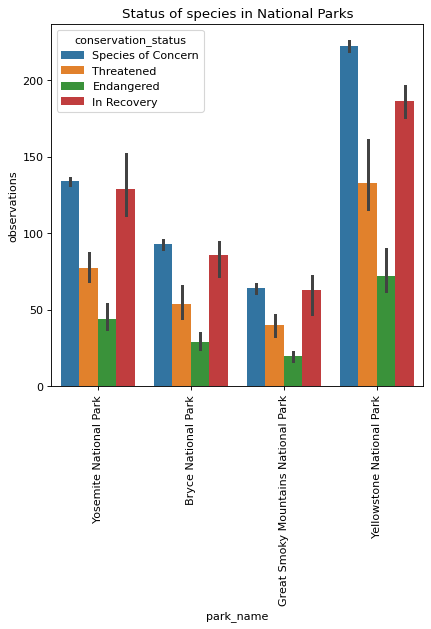

In [21]:
fig = plt.figure(figsize=(6, 6), dpi=80)
bar1 = sns.barplot(x="park_name",  y="observations", data=df_conservation, hue='conservation_status')
plt.xticks(rotation=90)
plt.title("Status of species in National Parks")

Apart from having more animals than any other park, Yellowstone also appears to have the largest number of endangered animals.